In [18]:
import cv2
import imutils
import pytesseract
import numpy as np
import base64
from matplotlib import pyplot as plt

In [19]:
#Installing tesseract
#https://github.com/UB-Mannheim/tesseract/wiki
#In the below code: 'C:\Program Files\Tesseract-OCR\\tesseract' is the path to which we installed tesseract. Replace this part with your path.
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

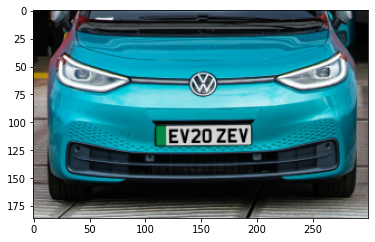

In [20]:
img = cv2.imread('Green.jpg')
imaimgge = imutils.resize(img, width=300 )
plt.imshow(cv2.cvtColor(imaimgge, cv2.COLOR_BGR2RGB))
plt.show()

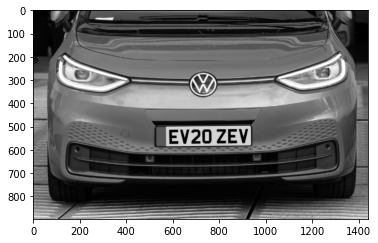

In [21]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.show()

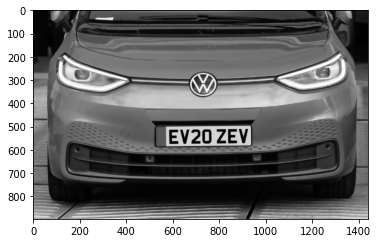

In [22]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 

plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.show()

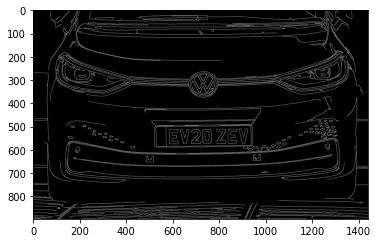

In [23]:
edged = cv2.Canny(gray_image, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=img.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
# cv2.imshow("contours",image1)
# cv2.waitKey(0)


array([[[  5,   6,   4],
        [  5,   6,   4],
        [  4,   5,   3],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[  2,   3,   1],
        [  2,   3,   1],
        [  2,   3,   1],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[  1,   2,   0],
        [  1,   2,   0],
        [  1,   2,   0],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [225, 219, 214],
        [228, 219, 215],
        [228, 222, 217]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [222, 213, 210],
        [223, 214, 211],
        [225, 216, 213]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [219, 207, 205],
        [220, 208, 206],
        [220, 208, 206]]

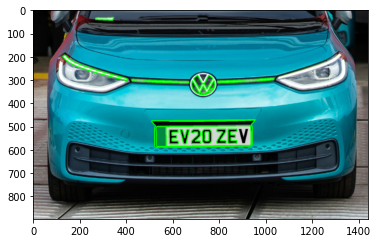

In [25]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = img.copy()
show_image = cv2.drawContours(image2,cnts,-1,(0,255,0),3)
show_image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) 
        new_img=img[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+=1
        break      

In [27]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
# cv2.imshow("image with detected license plate", img)
# cv2.waitKey(0)

array([[[  5,   6,   4],
        [  5,   6,   4],
        [  4,   5,   3],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[  2,   3,   1],
        [  2,   3,   1],
        [  2,   3,   1],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[  1,   2,   0],
        [  1,   2,   0],
        [  1,   2,   0],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[158, 158, 158],
        [156, 157, 155],
        [154, 154, 154],
        ...,
        [225, 219, 214],
        [228, 219, 215],
        [228, 222, 217]],

       [[180, 181, 177],
        [177, 178, 174],
        [173, 174, 170],
        ...,
        [222, 213, 210],
        [223, 214, 211],
        [225, 216, 213]],

       [[217, 217, 211],
        [217, 217, 211],
        [214, 216, 210],
        ...,
        [219, 207, 205],
        [220, 208, 206],
        [220, 208, 206]]

In [28]:
Cropped_loc = './7.png'
#cv2.imshow("cropped", cv2.imread(Cropped_loc))
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')
print("Number plate is:", plate)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Number plate is: EV20 ZEV

